In [3]:
import cv2
import os

Extracting the Dataset

In [4]:
import os

dataset_path = "/kaggle/input/shoplifting-dataset/Shoplifting dataset"

print(os.listdir(dataset_path))


['Normal', 'Shoplifting']


In [5]:
import shutil
import os

source_dir = "/kaggle/input/shoplifting-dataset/Shoplifting dataset"
target_dir = "data/shoplifting_dataset"

os.makedirs(target_dir, exist_ok=True)

shutil.copytree(source_dir, target_dir, dirs_exist_ok=True)

print("✅ Dataset copied successfully!")


✅ Dataset copied successfully!


Loading and Preprocessing the CSV File

In [6]:
import os

normal_dir = "/kaggle/working/data/shoplifting_dataset/Normal"

files = os.listdir(normal_dir)
print(f"Total Normal samples: {len(files)}")
print("Sample files:", files[:5])


Total Normal samples: 90
Sample files: ['Normal (50).mp4', 'Normal (35).mp4', 'Normal (61).mp4', 'Normal (77).mp4', 'Normal (21).mp4']


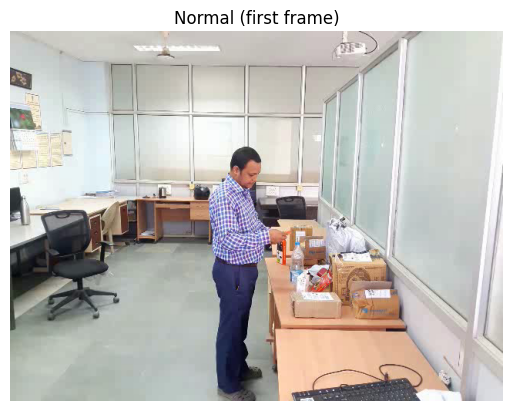

In [7]:
import cv2
import matplotlib.pyplot as plt
import os

video_path = os.path.join(normal_dir, os.listdir(normal_dir)[0])
cap = cv2.VideoCapture(video_path)

ret, frame = cap.read()
cap.release()

if ret:
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Normal (first frame)")
    plt.show()
else:
    print("Could not read video")


Extracting Frames from Videos

In [8]:
import os
import cv2

# Function to extract frames from a video
def extract_frames(video_path, target, output_dir, start_index, frame_skip=5):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Cannot open {video_path}")
        return 0

    frame_count = 0
    frame_dir = os.path.join(output_dir, "normal" if target == 0 else "abnormal")
    os.makedirs(frame_dir, exist_ok=True)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % frame_skip == 0:  # save every nth frame
            cv2.imwrite(os.path.join(frame_dir, f"frame_{start_index + frame_count:06d}.jpg"), frame)

        frame_count += 1

    cap.release()
    return frame_count

# Dataset paths
normal_dir = "/kaggle/working/data/shoplifting_dataset/Normal"
shoplifting_dir = "/kaggle/working/data/shoplifting_dataset/Shoplifting"

# Output directory
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

i = 0

# Process Normal videos
for video_file in os.listdir(normal_dir):
    video_path = os.path.join(normal_dir, video_file)
    frames_extracted = extract_frames(video_path, target=0, output_dir=output_dir, start_index=i)
    i += frames_extracted

# Process Shoplifting videos
for video_file in os.listdir(shoplifting_dir):
    video_path = os.path.join(shoplifting_dir, video_file)
    frames_extracted = extract_frames(video_path, target=1, output_dir=output_dir, start_index=i)
    i += frames_extracted

print("Frame extraction completed.")


Frame extraction completed.


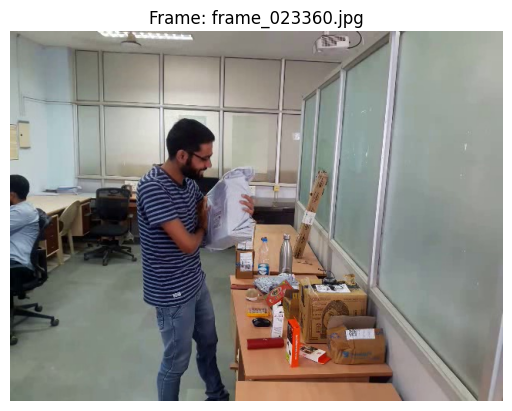

In [9]:
import matplotlib.pyplot as plt
import cv2
import os
import random

# Choose a folder (normal or abnormal)
folder = "output/normal"  # or "output/abnormal"

# List all extracted frames
frames = os.listdir(folder)
if not frames:
    print("No frames found in the folder.")
else:
    # Pick a random frame
    frame_file = random.choice(frames)
    frame_path = os.path.join(folder, frame_file)

    # Read the frame
    frame = cv2.imread(frame_path)

    if frame is not None:
        # Convert BGR to RGB for Matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame_rgb)
        plt.axis("off")
        plt.title(f"Frame: {frame_file}")
        plt.show()
    else:
        print("Could not read the frame.")


Splitting Data for Testing

In [10]:
import os
import random
import shutil

# Define the output directories
output_dir = "output"  # contains 'normal' and 'abnormal'
test_dir = "test"      # where test images will go
os.makedirs(test_dir, exist_ok=True)

# Classes to split
classes = ["normal", "abnormal"]

# Percentage of data to move to test set
test_ratio = 0.2

for cls in classes:
    class_output_dir = os.path.join(output_dir, cls)
    class_test_dir = os.path.join(test_dir, cls)
    os.makedirs(class_test_dir, exist_ok=True)

    # List all files in the class folder
    files = os.listdir(class_output_dir)

    # Calculate number of files to move
    num_files_to_move = int(test_ratio * len(files))

    # Randomly select files
    files_to_move = random.sample(files, num_files_to_move)

    # Move the selected files
    for file_name in files_to_move:
        src = os.path.join(class_output_dir, file_name)
        dst = os.path.join(class_test_dir, file_name)
        shutil.move(src, dst)

    print(f"{num_files_to_move} images moved to test/{cls} directory.")

print("Data split into train and test sets completed.")


1226 images moved to test/normal directory.
1217 images moved to test/abnormal directory.
Data split into train and test sets completed.


In [11]:


import numpy as np 
import pandas as pd 
import tensorflow as tf

2026-01-11 14:31:58.976601: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768141919.440813      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768141919.585474      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768141920.657098      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768141920.657153      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768141920.657156      55 computation_placer.cc:177] computation placer alr

In [12]:
# Updated paths for your dataset
train_dir = "output"  # contains 'normal' and 'abnormal' subfolders
test_dir = "test"     # contains 'normal' and 'abnormal' subfolders


In [13]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=2) # stop

In [14]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",  # 0 or 1
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="int",  # 0 or 1
    image_size=(224, 224),
    batch_size=32,
    shuffle=False
)


Found 9776 files belonging to 2 classes.


I0000 00:00:1768141940.929940      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1768141940.933870      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 2443 files belonging to 2 classes.


In [15]:
classes=train_data.class_names
print(classes)

['abnormal', 'normal']


In [16]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 50 #@param {type:"slider", min:10, max:100, step:10}

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.layers.experimental import preprocessing

# NEW: Newer versions of TensorFlow (2.10+) can use the tensorflow.keras.layers API directly for data augmentation
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
], name ="data_augmentation")

In [18]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow as tf

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False  # freeze base model layers

# Create Functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)

# Add L2 regularization to the Dense layer
# Add L2 regularization to the Dense layer
x = layers.Dense(1, kernel_regularizer=regularizers.l2(0.001))(x)

# Sigmoid activation for probability of abnormal
outputs = layers.Activation("sigmoid", dtype=tf.float32, name="output")(x)

model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(
    loss="binary_crossentropy",  # expects scalar labels 0 or 1
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)



24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [20]:
# Train the model
model.fit(train_data, epochs=10
          , validation_data=test_data,callbacks=[ early_stopping])

Epoch 1/10


I0000 00:00:1768141958.590182     934 service.cc:152] XLA service 0x7af328002f50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1768141958.590241     934 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1768141958.590246     934 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1768141961.353933     934 cuda_dnn.cc:529] Loaded cuDNN version 91002
2026-01-11 14:32:49.454686: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-11 14:32:49.592313: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-11 14:32:50.918400: E external/local_xl

  3/306 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - accuracy: 0.5503 - loss: 0.6917 

I0000 00:00:1768141978.698091     934 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


305/306 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6833 - loss: 0.5949

2026-01-11 14:33:17.264657: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-11 14:33:17.398346: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-11 14:33:18.771086: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-11 14:33:18.912049: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.6835 - loss: 0.5946

2026-01-11 14:33:40.245469: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-11 14:33:40.378007: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-11 14:33:41.697523: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-11 14:33:41.837799: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


306/306 ━━━━━━━━━━━━━━━━━━━━ 78s 149ms/step - accuracy: 0.6837 - loss: 0.5944 - val_accuracy: 0.8178 - val_loss: 0.4276
Epoch 2/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.8238 - loss: 0.4310 - val_accuracy: 0.8494 - val_loss: 0.3755
Epoch 3/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.8400 - loss: 0.3926 - val_accuracy: 0.8686 - val_loss: 0.3487
Epoch 4/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.8526 - loss: 0.3729 - val_accuracy: 0.8821 - val_loss: 0.3359
Epoch 5/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.8685 - loss: 0.3556 - val_accuracy: 0.8940 - val_loss: 0.3187
Epoch 6/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.8679 - loss: 0.3473 - val_accuracy: 0.8981 - val_loss: 0.3102
Epoch 7/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.8747 - loss: 0.3363 - val_accuracy: 0.9005 - val_loss: 0.3050
Epoch 8/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.8785 - loss: 0.3367 - val_accura

In [21]:
predictions = model.predict(test_data)
binary_predictions = (predictions > 0.5).astype(int).flatten()


77/77 ━━━━━━━━━━━━━━━━━━━━ 14s 107ms/step


In [22]:
# True labels
true_labels = []
for images, labels in test_data:
    true_labels.extend(labels.numpy().flatten())  # binary labels

# Predictions
predictions = model.predict(test_data)
binary_predictions = (predictions > 0.5).astype(int).flatten()

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(true_labels, binary_predictions)
precision = precision_score(true_labels, binary_predictions)
recall = recall_score(true_labels, binary_predictions)
f1 = f1_score(true_labels, binary_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step
Accuracy: 0.9132214490380679
Precision: 0.9023809523809524
Recall: 0.9274061990212071
F1 Score: 0.914722445695897


In [24]:
model.save("efficientNetModel.h5")